<a href="https://colab.research.google.com/github/mbhargava4/CS-539-Final-Project-Equation-Solver/blob/main/ResNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
drive.mount('/content/drive')

# Adjust the path below according to where you have stored your dataset in Google Drive
dataset_path = '/content/drive/My Drive/ECE_class/CS 539 Group /processed_data/'

Mounted at /content/drive


In [2]:
# Define the ratio for splitting
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# Create directories for the train, validation, and test sets
for category in ['train', 'val', 'test']:
    category_path = os.path.join(dataset_path, category)
    if not os.path.exists(category_path):
        os.makedirs(category_path)

# Split the data and move files
for label_folder in os.listdir(dataset_path):
    if label_folder=='train' or label_folder=='val' or label_folder=='test' or label_folder=='validation':
      continue
    if label_folder not in ['train', 'val', 'test']:  # Avoid the directories we just created
        # Path to original label folder
        label_folder_path = os.path.join(dataset_path, label_folder)

        # Images in the label folder
        images = [f for f in os.listdir(label_folder_path) if os.path.isfile(os.path.join(label_folder_path, f))]

        # Split the data
        print(label_folder)
        train_val_files, test_files = train_test_split(images, test_size=test_ratio, random_state=42)
        train_files, val_files = train_test_split(train_val_files, test_size=validation_ratio/(1 - test_ratio), random_state=42)

        # Function to copy files to new directories
        def copy_files(files, kind):
            # Create a folder for the current label in train/val/test directories if it doesn't exist
            new_folder = os.path.join(dataset_path, kind, label_folder)
            if not os.path.exists(new_folder):
                os.makedirs(new_folder)
            # Copy each file to the new directory
            for file in files:
                shutil.copy(os.path.join(label_folder_path, file), new_folder)

        # Copy files to the respective directories
        copy_files(train_files, 'train')
        copy_files(val_files, 'val')
        copy_files(test_files, 'test')


1
+
-
!
2
3
4
\lim
x
\rightarrow
\sqrt
y
z
\times
k
\pi
0
\tan
\infty
(
e
)
d
\alpha
\sin
\cos
c
7
\theta
\log
8
9
6
\beta
n
5
\gamma
\div
\phi
\sum
=
\int


In [3]:
print(os.listdir('/content/drive/My Drive/ECE_class/CS 539 Group /processed_data/'))

['1', '+', '-', '!', '2', '3', '4', '\\lim', 'x', '\\rightarrow', '\\sqrt', 'y', 'z', '\\times', 'k', '\\pi', '0', '\\tan', '\\infty', '(', 'e', ')', 'd', '\\alpha', '\\sin', '\\cos', 'c', '7', '\\theta', '\\log', '8', '9', '6', '\\beta', 'n', '5', '\\gamma', '\\div', '\\phi', '\\sum', '=', '\\int', 'train', 'val', 'test']


In [4]:
# Define path to your training, validation, and testing directories
train_dir = '/content/drive/My Drive/ECE_class/CS 539 Group /processed_data/train'
val_dir = '/content/drive/My Drive/ECE_class/CS 539 Group /processed_data/val'
test_dir = '/content/drive/My Drive/ECE_class/CS 539 Group /processed_data/test'

# ImageDataGenerators with ResNet50 preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet.preprocess_input
)

# Data loaders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 8166 images belonging to 42 classes.
Found 1776 images belonging to 42 classes.
Found 1777 images belonging to 42 classes.


In [5]:
# Load the base ResNet model without top layers
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Assuming 'base_model' is your pretrained ResNet50 model loaded without the top layer
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(42, activation='softmax')(x)  # Change from 10 to 42 to match the number of classes

# Recreate the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model again
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# View the model structure
model.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                         

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)


Epoch 1/5
256/256 [==============================] - 2179s 8s/step - loss: 2.0718 - accuracy: 0.4214 - val_loss: 1.7596 - val_accuracy: 0.5000
Epoch 2/5
256/256 [==============================] - 2160s 8s/step - loss: 1.6039 - accuracy: 0.5333 - val_loss: 1.4692 - val_accuracy: 0.5676
Epoch 3/5
256/256 [==============================] - 2129s 8s/step - loss: 1.4830 - accuracy: 0.5732 - val_loss: 1.3099 - val_accuracy: 0.6295
Epoch 4/5
256/256 [==============================] - 2128s 8s/step - loss: 1.4270 - accuracy: 0.5820 - val_loss: 1.2829 - val_accuracy: 0.6396
Epoch 5/5
256/256 [==============================] - ETA: 0s - loss: 1.3779 - accuracy: 0.5970

56/56 [==============================] - 368s 6s/step


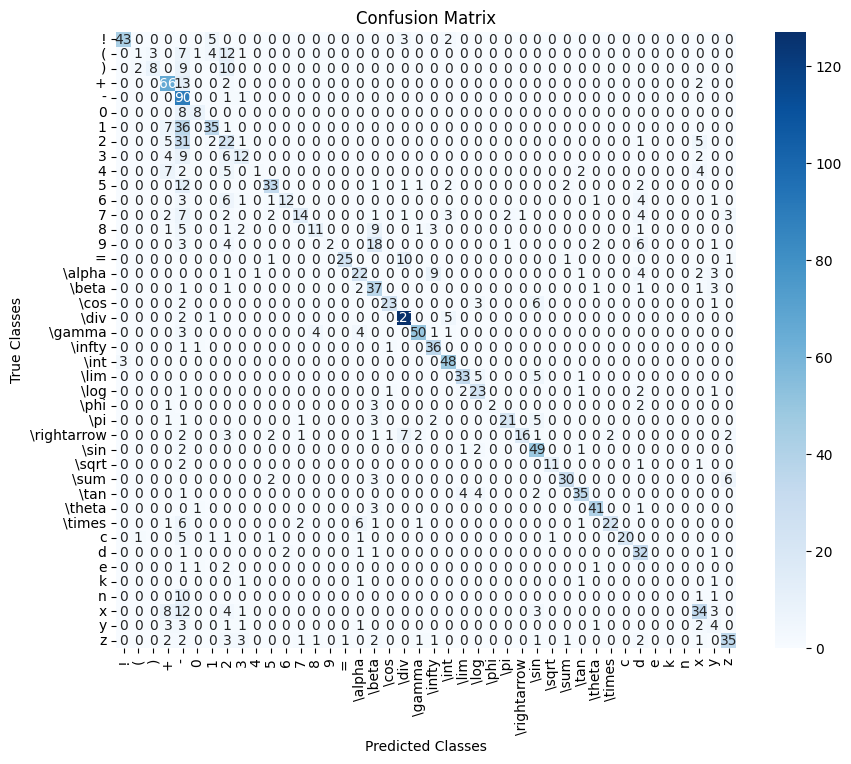

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of class labels from the generator
class_labels = list(test_generator.class_indices.keys())  # Labels as list of class names
class_indices = list(test_generator.class_indices.values())  # Indices as list of class indices

# Predictions and true classes
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Ensure the generator has not been shuffled; otherwise, true_classes will not align with predicted_classes
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=class_indices)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')
plt.show()



In [11]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

56/56 [==============================] - 360s 6s/step - loss: 1.2575 - accuracy: 0.6382
Test accuracy: 0.6381542086601257


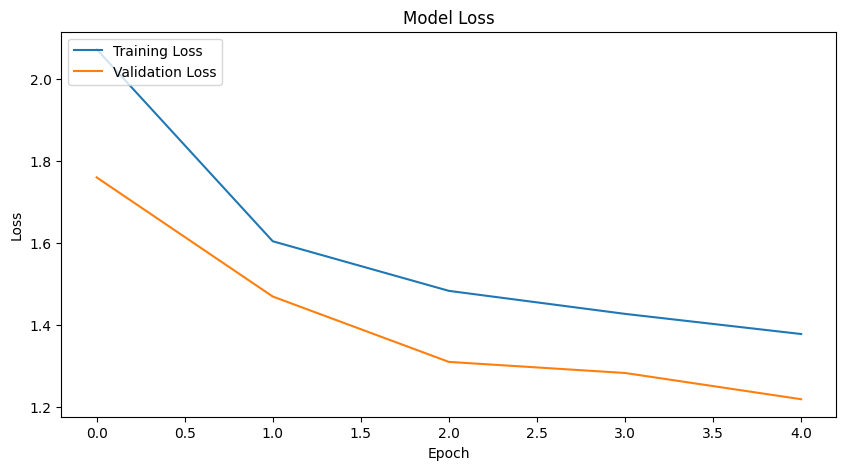

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()
